Ce îi poate face pe oameni fericiți? Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de fericire, etc.

Folsind datele aferente anului 2017 (fisierul v1_world-happiness-report-2017.csv), să se realizeze o predicție a gradului de fericire în funcție:

 - doar de Produsul intern brut (cu tool)
 - doar de caracteristica "Family" (cu tool)
 - de Produsul intern brut si de gradul de libertate (cu tool).

In [462]:
!wget https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab05/data/v1_world-happiness-report-2017.csv

--2024-04-05 10:12:54--  https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab05/data/v1_world-happiness-report-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20530 (20K) [text/plain]
Saving to: ‘v1_world-happiness-report-2017.csv.5’

v1_world-happiness- 100%[===================>]  20.05K  --.-KB/s    in 0.006s  

2024-04-05 10:12:54 (3.25 MB/s) - ‘v1_world-happiness-report-2017.csv.5’ saved [20530/20530]



In [463]:
!wget https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab05/data/v2_world-happiness-report-2017.csv

--2024-04-05 10:12:55--  https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab05/data/v2_world-happiness-report-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20500 (20K) [text/plain]
Saving to: ‘v2_world-happiness-report-2017.csv.5’

v2_world-happiness- 100%[===================>]  20.02K  --.-KB/s    in 0.006s  

2024-04-05 10:12:55 (3.05 MB/s) - ‘v2_world-happiness-report-2017.csv.5’ saved [20500/20500]



In [464]:
!wget https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab05/data/v3_world-happiness-report-2017.csv

--2024-04-05 10:12:55--  https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab05/data/v3_world-happiness-report-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434 (20K) [text/plain]
Saving to: ‘v3_world-happiness-report-2017.csv.5’

v3_world-happiness- 100%[===================>]  19.96K  --.-KB/s    in 0.005s  

2024-04-05 10:12:55 (4.27 MB/s) - ‘v3_world-happiness-report-2017.csv.5’ saved [20434/20434]



In [465]:
import csv
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import exp
from math import log2
from numpy.linalg import inv

In [672]:
class MyRegression:
  def __init__(self):
    self.intercept_ = 0.0
    self.coef_1 = 0.0
    self.coef_2 = 0.0

  def fit(self, x, y):
    sx = sum(x)
    sy = sum(y)
    sx2 = sum(i * i for i in x)
    sxy = sum(i * j for (i,j) in zip(x, y))
    w1 = (len(x) * sxy - sx * sy) / (len(x) * sx2 - sx * sx)
    w0 = (sy - w1 * sx) / len(x)
    self.intercept_, self.coef_1 =  w0, w1

  def fit2(self, x, y):
    x = np.array(x)
    y = np.array(y)
    x2 = np.hstack([np.ones((x.shape[0], 1)), x])
    w = np.linalg.inv(x2.T.dot(x2)).dot(x2.T).dot(y)
    self.intercept_, self.coef_1, self.coef_2 = w[0], w[1], w[2]

  def predict(self, x):
    if (isinstance(x[0], list) and len(x[0]) == 1):
      return [self.intercept_ + self.coef_1 * val[0] for val in x]
    elif (isinstance(x[0], list) and len(x[0]) == 2):
      return [self.intercept_ + self.coef_1 * val[0] + self.coef_2 * val[1] for val in x]
    else:
      return [self.intercept_ + self.coef_1 * val for val in x]

In [673]:
def loadData(fileName, inputVariabName, outputVariabName):
  data = []
  dataNames = []
  with open(fileName) as csvFile:
    csvReader = csv.reader(csvFile, delimiter=',')
    lineCount = 0
    for row in csvReader:
      if lineCount == 0:
        dataNames = row
      else:
        data.append(row)
      lineCount += 1
  selectedVariable = dataNames.index(inputVariabName)
  for i in range(len(data)):
    if data[i][selectedVariable] == "":
      data[i][selectedVariable] = np.nan
  inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
  selectedOutput = dataNames.index(outputVariabName)
  outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
  return inputs, outputs

crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'v1_world-happiness-report-2017.csv')

inputsGdp, outputsHappiness = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
inputsFamily, outputsHappiness = loadData(filePath, 'Family', 'Happiness.Score')
inputsFreedom, outputsHappiness = loadData(filePath, 'Freedom', 'Happiness.Score')

print('in Gdp: ', inputsGdp[:5])
print('in Family: ', inputsFamily[:5])
print('in Freedom: ', inputsFreedom[:5])
print('out Happiness: ', outputsHappiness[:5])

in Gdp:  [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
in Family:  [1.510041952, 1.510041952, 1.510041952, 1.510041952, 1.510041952]
in Freedom:  [0.635422587, 0.626006722, 0.627162635, 0.620070577, 0.617950857]
out Happiness:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


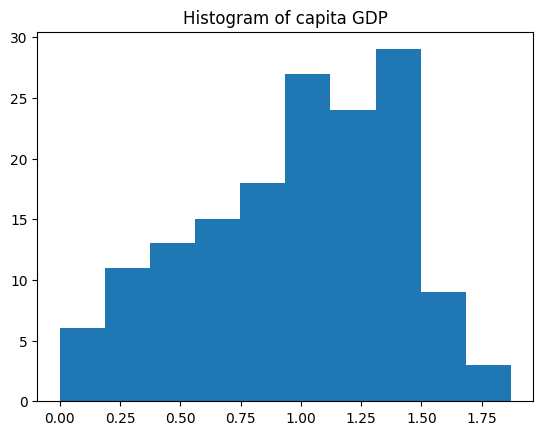

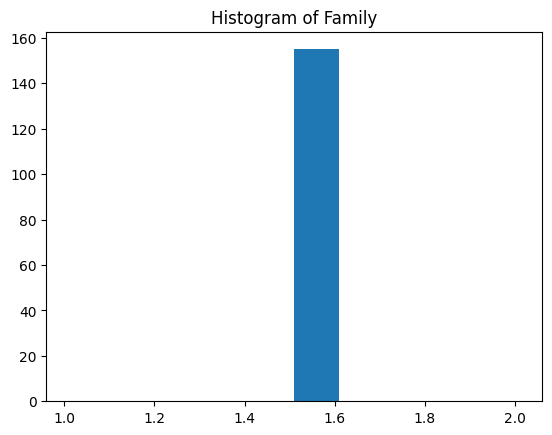

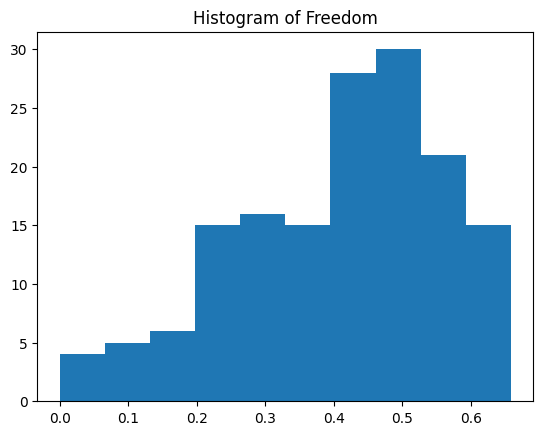

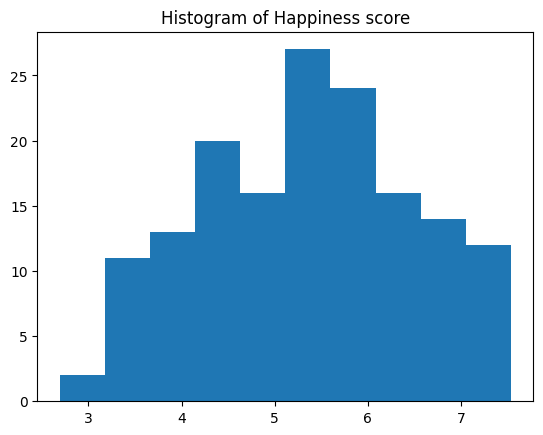

In [674]:
def plotData(x, variableName):
  n, bins, patches = plt.hist(x, 10)
  plt.title('Histogram of ' + variableName)
  plt.show()

plotData(inputsGdp, 'capita GDP')
plotData(inputsFamily, 'Family')
plotData(inputsFreedom, 'Freedom')
plotData(outputsHappiness, 'Happiness score')

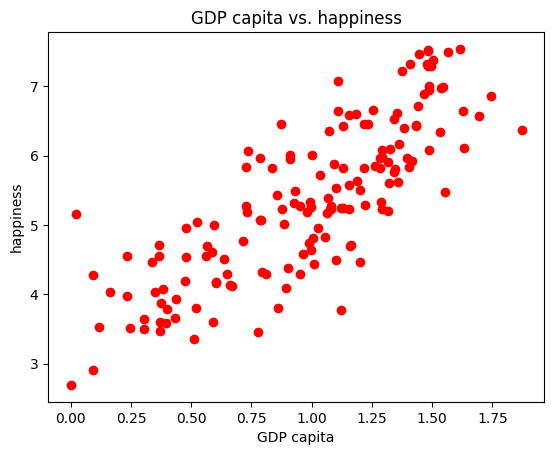

In [675]:
plt.plot(inputsGdp, outputsHappiness, 'ro')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()

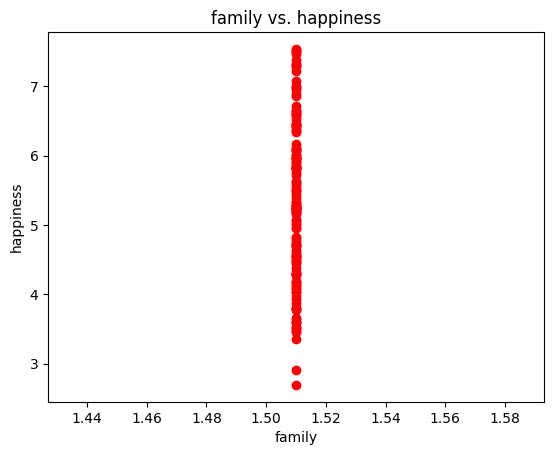

In [676]:
plt.plot(inputsFamily, outputsHappiness, 'ro')
plt.xlabel('family')
plt.ylabel('happiness')
plt.title('family vs. happiness')
plt.show()

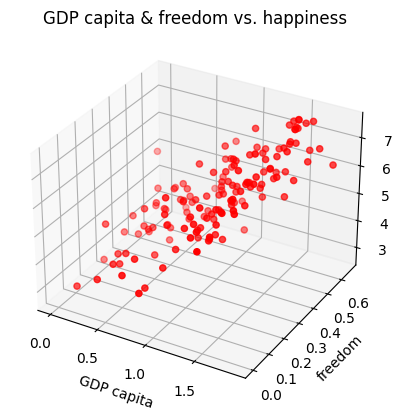

In [677]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputsGdp, inputsFreedom, outputsHappiness, color='r', marker='o')
ax.set_xlabel('GDP capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('GDP capita & freedom vs. happiness')
plt.show()

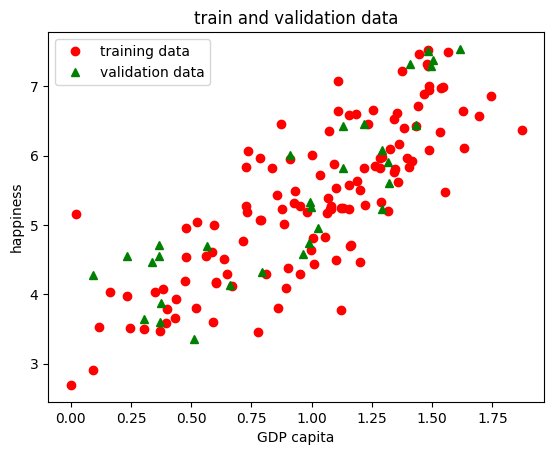

In [678]:
np.random.seed(5)
indexesGdp = [i for i in range(len(inputsGdp))]
trainSampleGdp = np.random.choice(indexesGdp, int(0.8 * len(inputsGdp)), replace=False)
validationSampleGdp = [i for i in indexesGdp if not i in trainSampleGdp]

trainInputs = [inputsGdp[i] for i in trainSampleGdp]
trainOutputs = [outputsHappiness[i] for i in trainSampleGdp]

validationInputs = [inputsGdp[i] for i in validationSampleGdp]
validationOutputs = [outputsHappiness[i] for i in validationSampleGdp]

plt.plot(trainInputs, trainOutputs, 'ro', label='training data')
plt.plot(validationInputs, validationOutputs, 'g^', label='validation data')
plt.title('train and validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

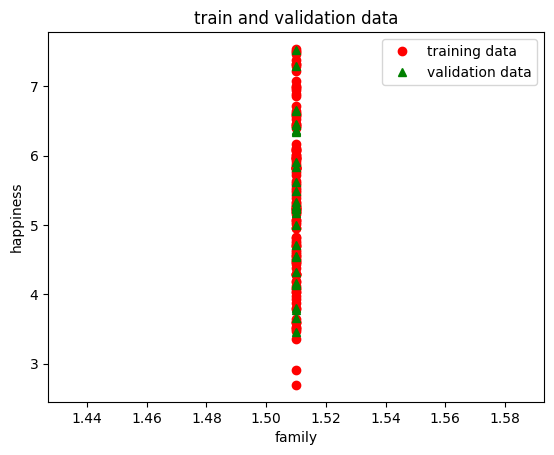

In [679]:
indexesFamily = [i for i in range(len(inputsFamily))]
trainSampleFamily = np.random.choice(indexesFamily, int(0.8 * len(inputsFamily)), replace=False)
validationSampleFamily = [i for i in indexesFamily if not i in trainSampleFamily]

trainInputsFamily = [inputsFamily[i] for i in trainSampleFamily]
trainOutputsFamily = [outputsHappiness[i] for i in trainSampleFamily]

validationInputsFamily = [inputsFamily[i] for i in validationSampleFamily]
validationOutputsFamily = [outputsHappiness[i] for i in validationSampleFamily]

plt.plot(trainInputsFamily, trainOutputsFamily, 'ro', label='training data')
plt.plot(validationInputsFamily, validationOutputsFamily, 'g^', label='validation data')
plt.xlabel('family')
plt.ylabel('happiness')
plt.title('train and validation data')
plt.legend()
plt.show()

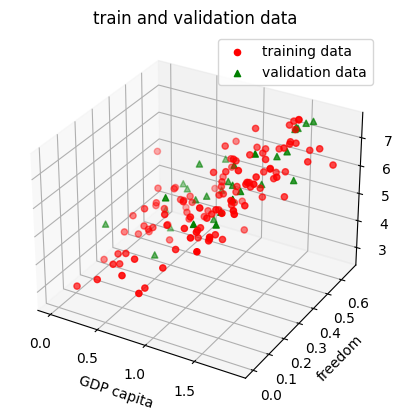

In [680]:
indexesGdpFreedom = [i for i in range(len(inputsFreedom))]
trainSampleGdpFreedom = np.random.choice(indexesGdpFreedom, int(0.8 * len(inputsFreedom)), replace=False)
validationSampleGdpFreedom = [i for i in indexesGdpFreedom if not i in trainSampleGdpFreedom]

trainInputsGdp = [inputsGdp[i] for i in trainSampleGdpFreedom]
trainInputsFreedom = [inputsFreedom[i] for i in trainSampleGdpFreedom]
trainOutputsGdpFreedom = [outputsHappiness[i] for i in trainSampleGdpFreedom]

validationInputsGdp = [inputsGdp[i] for i in validationSampleGdpFreedom]
validationInputsFreedom = [inputsFreedom[i] for i in validationSampleGdpFreedom]
validationOutputsGdpFreedom = [outputsHappiness[i] for i in validationSampleGdpFreedom]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputsGdp, trainInputsFreedom, trainOutputsGdpFreedom, color='r', marker='o', label='training data')
ax.scatter(validationInputsGdp, validationInputsFreedom, validationOutputsGdpFreedom, color='g', marker='^', label='validation data')
ax.set_xlabel('GDP capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('train and validation data')
ax.legend()
plt.show()

In [681]:
xxGdp = [[el] for el in trainInputs]
regressorGdp = linear_model.LinearRegression()
regressorGdp.fit(xxGdp, trainOutputs)
w0Gdp, w1Gdp = regressorGdp.intercept_, regressorGdp.coef_[0]
print('the learnt model: f(x) = ', w0Gdp, ' + ', w1Gdp, ' * x')

myRegressorGdp = MyRegression()
myRegressorGdp.fit(trainInputs, trainOutputs)
myW0Gdp, myW1Gdp = myRegressorGdp.intercept_, myRegressorGdp.coef_1
print('my learnt model: f(x) = ', myW0Gdp, ' + ', myW1Gdp, ' * x')

the learnt model: f(x) =  3.2007686226678995  +  2.1503460961741077  * x
my learnt model: f(x) =  3.2007686226678858  +  2.1503460961741205  * x


In [682]:
xxFamily = [[el] for el in trainInputsFamily]
regressorFamily = linear_model.LinearRegression()
regressorFamily.fit(xxFamily, trainOutputsFamily)
w0Family, w1Family = regressorFamily.intercept_, regressorFamily.coef_[0]
print('the learnt model: f(x) = ', w0Family, ' + ', w1Family, ' * x')

myRegressorFamily = MyRegression()
myRegressorFamily.fit(trainInputsFamily, trainOutputsFamily)
myW0Family, myW1Family = myRegressorFamily.intercept_, myRegressorFamily.coef_1
print('my learnt model: f(x) = ', myW0Family, ' + ', myW1Family, ' * x')

the learnt model: f(x) =  11.254318762015949  +  -3.9064153190823543  * x
my learnt model: f(x) =  -1.691394694400523  +  4.666666666666667  * x


In [683]:
xxGdpFreedom = [[x1, x2] for (x1, x2) in zip(trainInputsGdp, trainInputsFreedom)]
regressorGdpFreedom = linear_model.LinearRegression()
regressorGdpFreedom.fit(xxGdpFreedom, trainOutputsGdpFreedom)
w0GdpFreedom, w1GdpFreedom, w2GdpFreedom = regressorGdpFreedom.intercept_, regressorGdpFreedom.coef_[0], regressorGdpFreedom.coef_[1]
print('the learnt model: f(x) = ', w0GdpFreedom, ' + ', w1GdpFreedom, ' * x1 + ', w2GdpFreedom, ' * x2')

myRegressorGdpFreedom = MyRegression()
myRegressorGdpFreedom.fit2(xxGdpFreedom, trainOutputsGdpFreedom)
myW0GdpFreedom, myW1GdpFreedom, myW2GdpFreedom = myRegressorGdpFreedom.intercept_, myRegressorGdpFreedom.coef_1, myRegressorGdpFreedom.coef_2
print('my learnt model: f(x) = ', myW0GdpFreedom, ' + ', myW1GdpFreedom, ' * x1 + ', myW2GdpFreedom, ' * x2')

the learnt model: f(x) =  2.5477381050513643  +  1.8377256068816088  * x1 +  2.2860752340412245  * x2
my learnt model: f(x) =  2.547738105051356  +  1.8377256068816084  * x1 +  2.2860752340412485  * x2


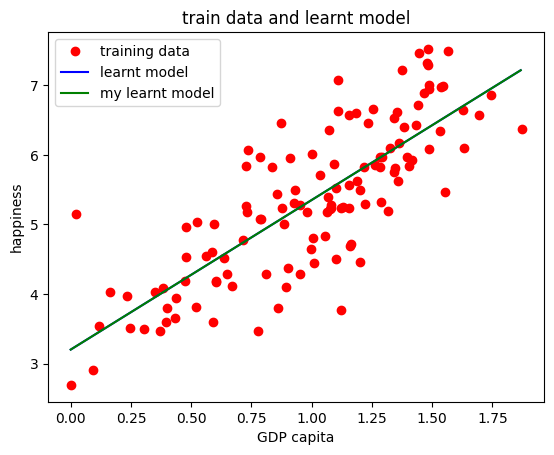

In [684]:
noOfPoints = 1000
xrefGdp = []
valGdp = min(trainInputs)
stepGdp = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
  xrefGdp.append(valGdp)
  valGdp += stepGdp
yrefGdp = [w0Gdp + w1Gdp * el for el in xrefGdp]
myYrefGdp = [myW0Gdp + myW1Gdp * el for el in xrefGdp]

plt.plot(trainInputs, trainOutputs, 'ro', label='training data')
plt.plot(xrefGdp, yrefGdp, 'b-', label='learnt model')
plt.plot(xrefGdp, yrefGdp, 'g-', label='my learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('train data and learnt model')
plt.legend()
plt.show()

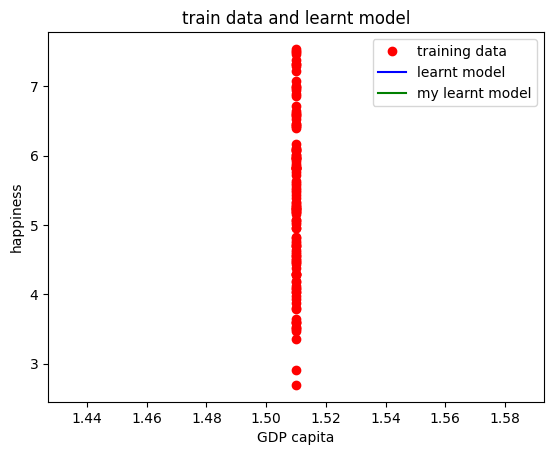

In [685]:
xrefFamily = []
valFamily = min(trainInputsFamily)
stepFamily = (max(trainInputsFamily) - min(trainInputsFamily)) / noOfPoints
for i in range(1, noOfPoints):
  xrefFamily.append(valFamily)
  valFamily += stepFamily
yrefFamily = [w0Family + w1Family * el for el in xrefFamily]
myYrefFamily = [myW0Family + myW1Family * el for el in xrefFamily]

plt.plot(trainInputsFamily, trainOutputsFamily, 'ro', label='training data')
plt.plot(xrefFamily, yrefFamily, 'b-', label='learnt model')
plt.plot(xrefFamily, myYrefFamily, 'g-', label='my learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('train data and learnt model')
plt.legend()
plt.show()

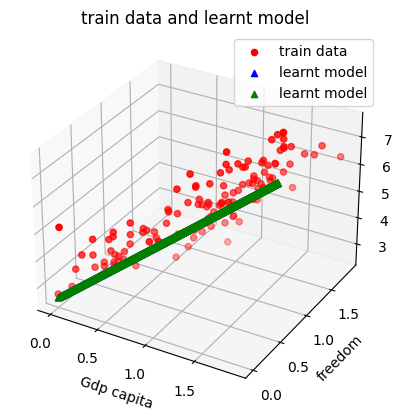

In [686]:
xrefGdpFreedom = []
yrefGdpFreedom = []
valGdp = min(trainInputsGdp)
valFreedom = min(trainInputsFreedom)
stepGdp = (max(trainInputsGdp) - min(trainInputsGdp)) / noOfPoints
stepFreedom = (max(trainInputsFreedom) - min(trainInputsFreedom)) / noOfPoints
for i in range(1, noOfPoints):
  xrefGdpFreedom.append(valGdp)
  yrefGdpFreedom.append(valFreedom)
  valGdp += stepGdp
  valFreedom += stepFreedom
zrefGdpFreedom = [w0GdpFreedom + w1GdpFreedom * x1 + w2GdpFreedom * x2 for (x1, x2) in zip(xrefGdpFreedom, yrefGdpFreedom)]
myZrefGdpFreedom = [myW0GdpFreedom + myW1GdpFreedom * x1 + myW2GdpFreedom * x2 for (x1, x2) in zip(xrefGdpFreedom, yrefGdpFreedom)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputsGdp, trainInputsGdp, trainOutputsGdpFreedom, c='r', marker='o', label='train data')
ax.scatter(xrefGdpFreedom, yrefGdpFreedom, zrefGdpFreedom, c='b', marker='^', label='learnt model')
ax.scatter(xrefGdpFreedom, yrefGdpFreedom, myZrefGdpFreedom, c='g', marker='^', label='learnt model')
ax.set_xlabel('Gdp capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('train data and learnt model')
ax.legend()
plt.show()

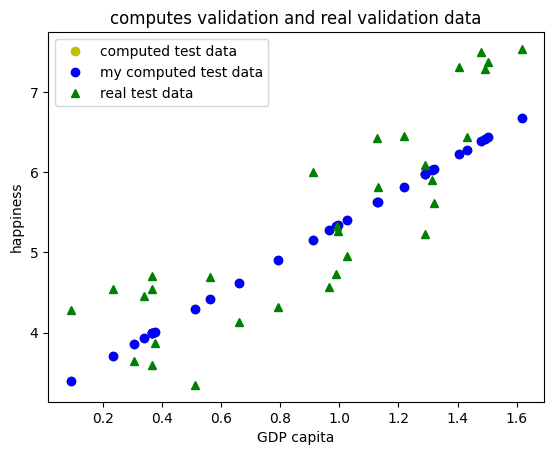

In [687]:
computedValidationOutputsGdp = regressorGdp.predict([[x] for x in validationInputs])
myComputedValidationOutputsGdp = myRegressorGdp.predict([[x] for x in validationInputs])

plt.plot(validationInputs, computedValidationOutputsGdp, 'yo', label='computed test data')
plt.plot(validationInputs, myComputedValidationOutputsGdp, 'bo', label='my computed test data')
plt.plot(validationInputs, validationOutputs, 'g^', label='real test data')
plt.title('computes validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

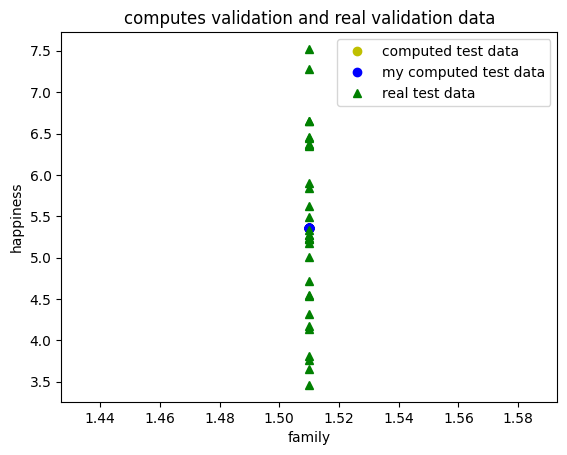

In [688]:
computedValidationOutputsFamily = regressorFamily.predict([[x] for x in validationInputsFamily])
myComputedValidationOutputsFamily = myRegressorFamily.predict([[x] for x in validationInputsFamily])

plt.plot(validationInputsFamily, computedValidationOutputsFamily, 'yo', label='computed test data')
plt.plot(validationInputsFamily, myComputedValidationOutputsFamily, 'bo', label='my computed test data')
plt.plot(validationInputsFamily, validationOutputsFamily, 'g^', label='real test data')
plt.title('computes validation and real validation data')
plt.xlabel('family')
plt.ylabel('happiness')
plt.legend()
plt.show()

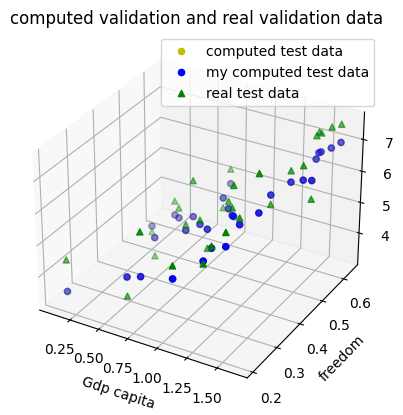

In [689]:
computedValidationOutputsGdpFreedom = regressorGdpFreedom.predict([[x1, x2] for (x1,x2) in zip(validationInputsGdp, validationInputsFreedom)])
myComputedValidationOutputsGdpFreedom = myRegressorGdpFreedom.predict([[x1, x2] for (x1,x2) in zip(validationInputsGdp, validationInputsFreedom)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(validationInputsGdp, validationInputsFreedom, computedValidationOutputsGdpFreedom, c='y', marker='o', label='computed test data')
ax.scatter(validationInputsGdp, validationInputsFreedom, myComputedValidationOutputsGdpFreedom, c='b', marker='o', label='my computed test data')
ax.scatter(validationInputsGdp, validationInputsFreedom, validationOutputsGdpFreedom, c='g', marker='^', label='real test data')
ax.set_xlabel('Gdp capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('computed validation and real validation data')
ax.legend()
plt.show()

In [690]:
error = 0.0
for t1, t2 in zip(computedValidationOutputsGdp, validationOutputs):
  error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputs, computedValidationOutputsGdp)
print('prediction error (tool): ', error)

print('My regressor:')

error = 0.0
for t1, t2 in zip(myComputedValidationOutputsGdp, validationOutputs):
  error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputs, myComputedValidationOutputsGdp)
print('prediction error (tool): ', error)

prediction error (manual):  0.4142120438505252
prediction error (tool):  0.41421204385052524
My regressor:
prediction error (manual):  0.4142120438505247
prediction error (tool):  0.4142120438505247


In [691]:
error = 0.0
for t1, t2 in zip(computedValidationOutputsFamily, validationOutputsFamily):
  error += (t1 - t2) ** 2
error = error / len(validationOutputsFamily)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputsFamily, computedValidationOutputsFamily)
print('prediction error (tool): ', error)

print('Me reggresor: ')

error = 0.0
for t1, t2 in zip(myComputedValidationOutputsFamily, validationOutputsFamily):
  error += (t1 - t2) ** 2
error = error / len(validationOutputsFamily)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputsFamily, myComputedValidationOutputsFamily)
print('prediction error (tool): ', error)

prediction error (manual):  1.132582185245057
prediction error (tool):  1.1325821852450568
Me reggresor: 
prediction error (manual):  1.1325821852450573
prediction error (tool):  1.1325821852450573


In [692]:
error = 0.0
for t1, t2 in zip(computedValidationOutputsGdpFreedom, validationOutputsGdpFreedom):
  error += (t1 - t2) ** 2
error = error / len(validationOutputsGdpFreedom)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputsGdpFreedom, computedValidationOutputsGdpFreedom)
print('prediction error (tool): ', error)

print('My reggresor: ')

error = 0.0
for t1, t2 in zip(myComputedValidationOutputsGdpFreedom, validationOutputsGdpFreedom):
  error += (t1 - t2) ** 2
error = error / len(validationOutputsGdpFreedom)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputsGdpFreedom, myComputedValidationOutputsGdpFreedom)
print('prediction error (tool): ', error)

prediction error (manual):  0.3816929999564107
prediction error (tool):  0.3816929999564108
My reggresor: 
prediction error (manual):  0.3816929999564098
prediction error (tool):  0.3816929999564097


Folsind datele aferente anului 2017 (fisierul v2_world-happiness-report-2017.csv), să se realizeze o predicție a gradului de fericire în funcție:

 - doar de Produsul intern brut (cu tool)
 - doar de caracteristica "Family" (cu tool)
 - de Produsul intern brut si de gradul de libertate (cu tool).

In [693]:
filePath = os.path.join(crtDir, 'v2_world-happiness-report-2017.csv')

inputsGdp, outputsHappiness = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
inputsFamily, outputsHappiness = loadData(filePath, 'Family', 'Happiness.Score')
inputsFreedom, outputsHappiness = loadData(filePath, 'Freedom', 'Happiness.Score')

print('in Gdp: ', inputsGdp[:5])
print('in Family: ', inputsFamily[:5])
print('in Freedom: ', inputsFreedom[:5])
print('out Happiness: ', outputsHappiness[:5])

in Gdp:  [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
in Family:  [1.53352356, 1.551121593, 1.610574007, 1.516911745, 1.540246725]
in Freedom:  [0.808231592, 0.741191506, 0.74031651, 0.782489777, 0.721785963]
out Happiness:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


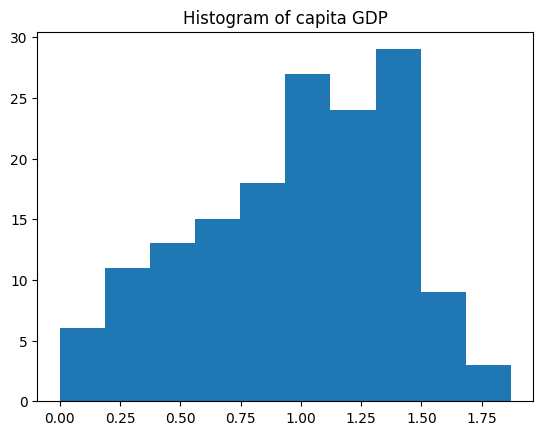

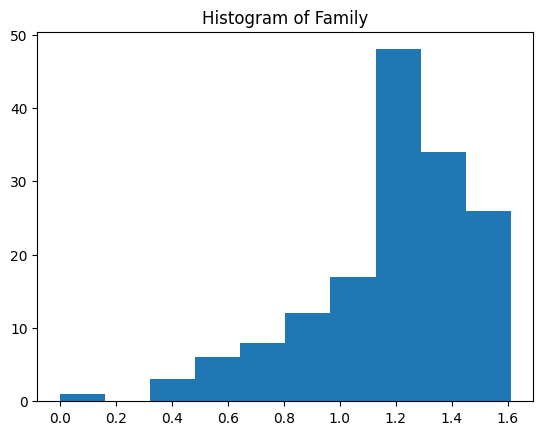

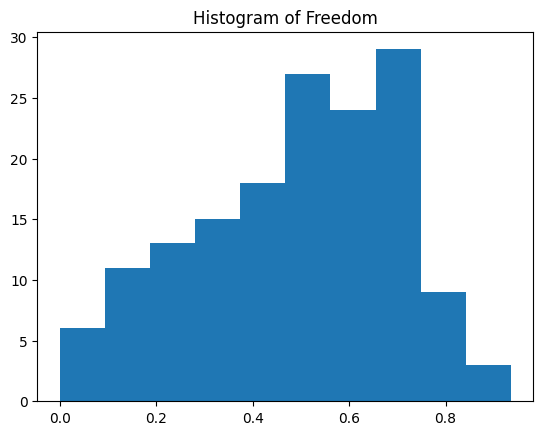

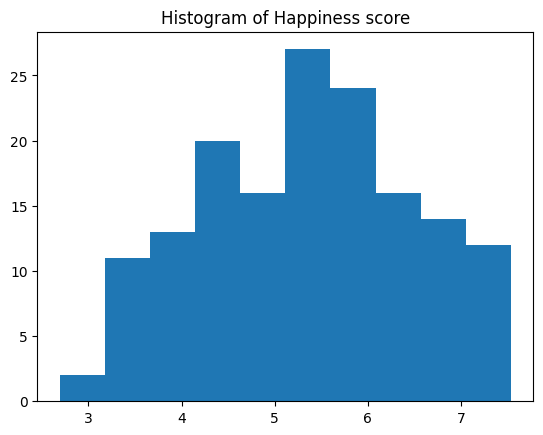

In [694]:
plotData(inputsGdp, 'capita GDP')
plotData(inputsFamily, 'Family')
plotData(inputsFreedom, 'Freedom')
plotData(outputsHappiness, 'Happiness score')

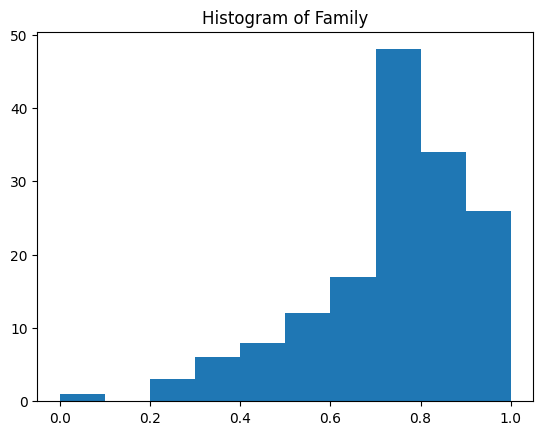

In [695]:
minVal = min(inputsFamily)
maxVal = max(inputsFamily)
normalFamily = [(x - minVal) / (maxVal - minVal) if maxVal > minVal else 0 for x in inputsFamily]
plotData(normalFamily, 'Family')

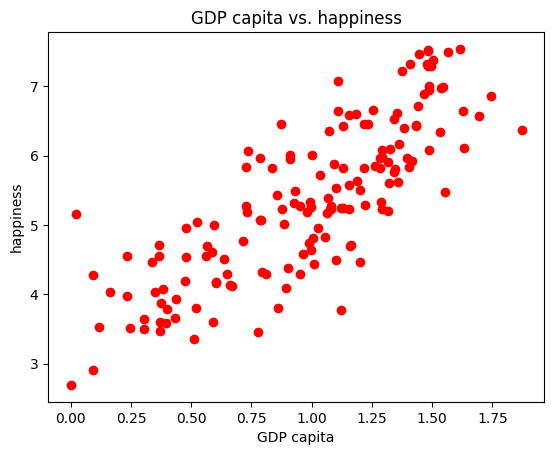

In [696]:
plt.plot(inputsGdp, outputsHappiness, 'ro')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()

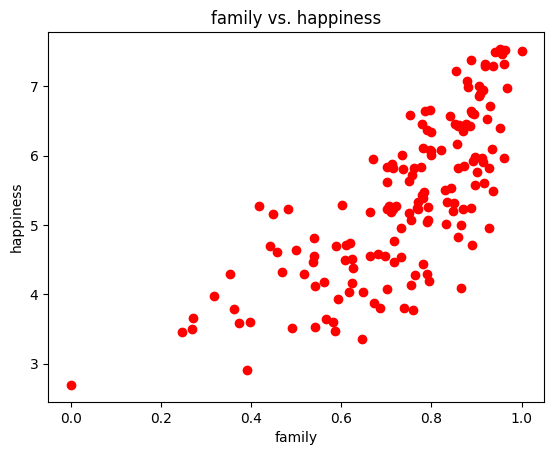

In [697]:
plt.plot(normalFamily, outputsHappiness, 'ro')
plt.xlabel('family')
plt.ylabel('happiness')
plt.title('family vs. happiness')
plt.show()

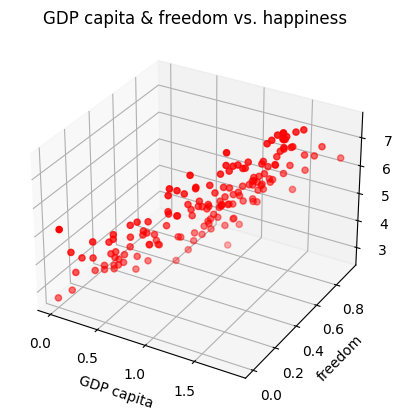

In [698]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputsGdp, inputsFreedom, outputsHappiness, color='r', marker='o')
ax.set_xlabel('GDP capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('GDP capita & freedom vs. happiness')
plt.show()

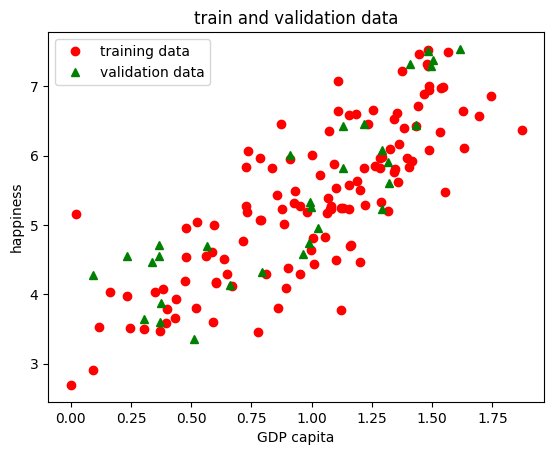

In [699]:
np.random.seed(5)
indexesGdp = [i for i in range(len(inputsGdp))]
trainSampleGdp = np.random.choice(indexesGdp, int(0.8 * len(inputsGdp)), replace=False)
validationSampleGdp = [i for i in indexesGdp if not i in trainSampleGdp]

trainInputs = [inputsGdp[i] for i in trainSampleGdp]
trainOutputs = [outputsHappiness[i] for i in trainSampleGdp]

validationInputs = [inputsGdp[i] for i in validationSampleGdp]
validationOutputs = [outputsHappiness[i] for i in validationSampleGdp]

plt.plot(trainInputs, trainOutputs, 'ro', label='training data')
plt.plot(validationInputs, validationOutputs, 'g^', label='validation data')
plt.title('train and validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

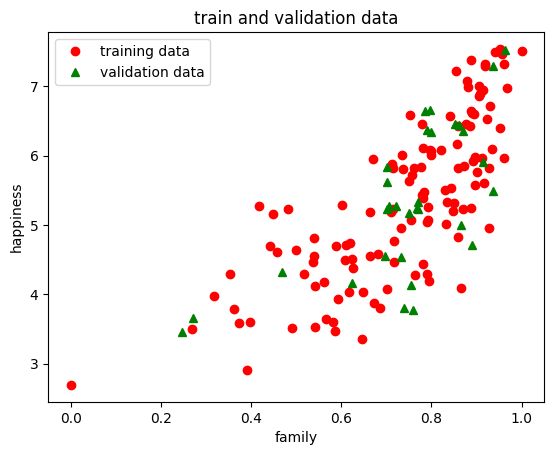

In [700]:
indexesFamily = [i for i in range(len(normalFamily))]
trainSampleFamily = np.random.choice(indexesFamily, int(0.8 * len(normalFamily)), replace=False)
validationSampleFamily = [i for i in indexesFamily if not i in trainSampleFamily]

trainInputsFamily = [normalFamily[i] for i in trainSampleFamily]
trainOutputsFamily = [outputsHappiness[i] for i in trainSampleFamily]

validationInputsFamily = [normalFamily[i] for i in validationSampleFamily]
validationOutputsFamily = [outputsHappiness[i] for i in validationSampleFamily]

plt.plot(trainInputsFamily, trainOutputsFamily, 'ro', label='training data')
plt.plot(validationInputsFamily, validationOutputsFamily, 'g^', label='validation data')
plt.xlabel('family')
plt.ylabel('happiness')
plt.title('train and validation data')
plt.legend()
plt.show()

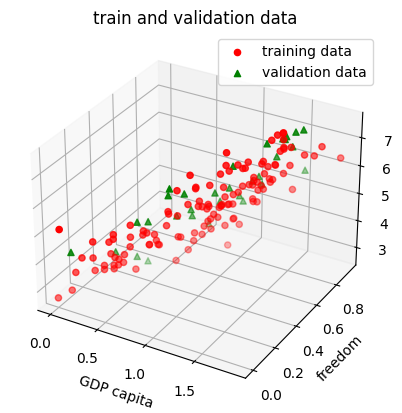

In [701]:
indexesGdpFreedom = [i for i in range(len(inputsFreedom))]
trainSampleGdpFreedom = np.random.choice(indexesGdpFreedom, int(0.8 * len(inputsFreedom)), replace=False)
validationSampleGdpFreedom = [i for i in indexesGdpFreedom if not i in trainSampleGdpFreedom]

trainInputsGdp = [inputsGdp[i] for i in trainSampleGdpFreedom]
trainInputsFreedom = [inputsFreedom[i] for i in trainSampleGdpFreedom]
trainOutputsGdpFreedom = [outputsHappiness[i] for i in trainSampleGdpFreedom]

validationInputsGdp = [inputsGdp[i] for i in validationSampleGdpFreedom]
validationInputsFreedom = [inputsFreedom[i] for i in validationSampleGdpFreedom]
validationOutputsGdpFreedom = [outputsHappiness[i] for i in validationSampleGdpFreedom]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputsGdp, trainInputsFreedom, trainOutputsGdpFreedom, color='r', marker='o', label='training data')
ax.scatter(validationInputsGdp, validationInputsFreedom, validationOutputsGdpFreedom, color='g', marker='^', label='validation data')
ax.set_xlabel('GDP capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('train and validation data')
ax.legend()
plt.show()

In [702]:
xxGdp = [[el] for el in trainInputs]
regressorGdp = linear_model.LinearRegression()
regressorGdp.fit(xxGdp, trainOutputs)
w0Gdp, w1Gdp = regressorGdp.intercept_, regressorGdp.coef_[0]
print('the learnt model: f(x) = ', w0Gdp, ' + ', w1Gdp, ' * x')

the learnt model: f(x) =  3.2007686226678995  +  2.1503460961741077  * x


In [703]:
xxFamily = [[el] for el in trainInputsFamily]
regressorFamily = linear_model.LinearRegression()
regressorFamily.fit(xxFamily, trainOutputsFamily)
w0Family, w1Family = regressorFamily.intercept_, regressorFamily.coef_[0]
print('the learnt model: f(x) = ', w0Family, ' + ', w1Family, ' * x')

the learnt model: f(x) =  1.7869634078695311  +  4.8480741528511055  * x


In [704]:
xxGdpFreedom = [[x1, x2] for (x1, x2) in zip(trainInputsGdp, trainInputsFreedom)]
regressorGdpFreedom = linear_model.LinearRegression()
regressorGdpFreedom.fit(xxGdpFreedom, trainOutputsGdpFreedom)
w0GdpFreedom, w1GdpFreedom, w2GdpFreedom = regressorGdpFreedom.intercept_, regressorGdpFreedom.coef_[0], regressorGdpFreedom.coef_[1]
print('the learnt model: f(x) = ', w0GdpFreedom, ' + ', w1GdpFreedom, ' * x1 + ', w2GdpFreedom, ' * x2')

the learnt model: f(x) =  3.1915842513244357  +  24975581.20160559  * x1 +  -49951158.15238181  * x2


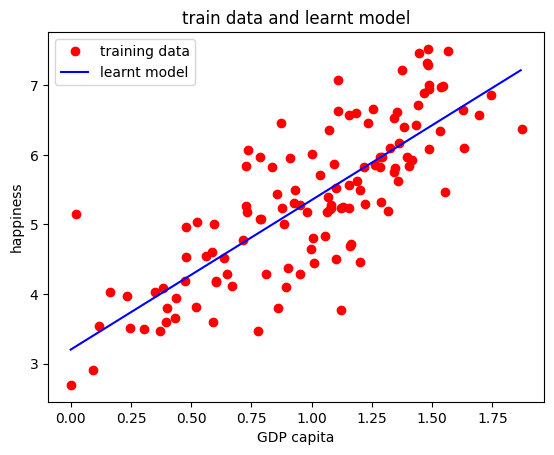

In [705]:
noOfPoints = 1000
xrefGdp = []
valGdp = min(trainInputs)
stepGdp = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
  xrefGdp.append(valGdp)
  valGdp += stepGdp
yrefGdp = [w0Gdp + w1Gdp * el for el in xrefGdp]

plt.plot(trainInputs, trainOutputs, 'ro', label='training data')
plt.plot(xrefGdp, yrefGdp, 'b-', label='learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('train data and learnt model')
plt.legend()
plt.show()

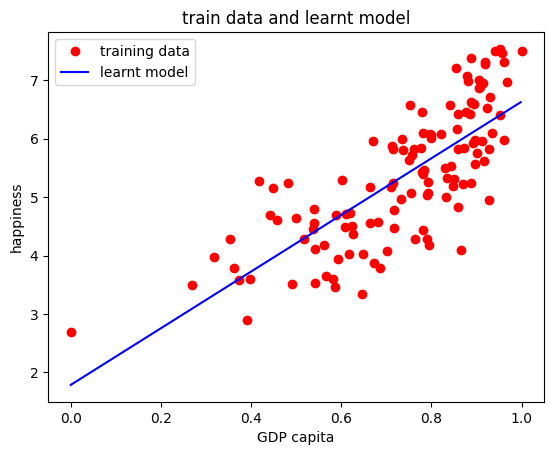

In [706]:
xrefFamily = []
valFamily = min(trainInputsFamily)
stepFamily = (max(trainInputsFamily) - min(trainInputsFamily)) / noOfPoints
for i in range(1, noOfPoints):
  xrefFamily.append(valFamily)
  valFamily += stepFamily
yrefFamily = [w0Family + w1Family * el for el in xrefFamily]

plt.plot(trainInputsFamily, trainOutputsFamily, 'ro', label='training data')
plt.plot(xrefFamily, yrefFamily, 'b-', label='learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('train data and learnt model')
plt.legend()
plt.show()

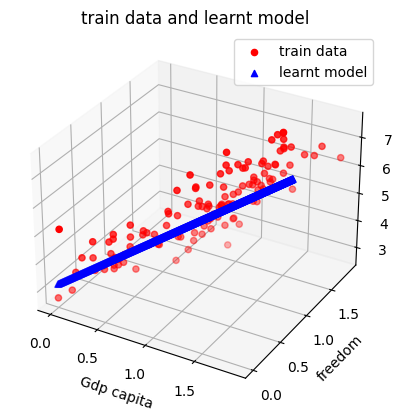

In [707]:
xrefGdpFreedom = []
yrefGdpFreedom = []
valGdp = min(trainInputsGdp)
valFreedom = min(trainInputsFreedom)
stepGdp = (max(trainInputsGdp) - min(trainInputsGdp)) / noOfPoints
stepFreedom = (max(trainInputsFreedom) - min(trainInputsFreedom)) / noOfPoints
for i in range(1, noOfPoints):
  xrefGdpFreedom.append(valGdp)
  yrefGdpFreedom.append(valFreedom)
  valGdp += stepGdp
  valFreedom += stepFreedom
zrefGdpFreedom = [w0GdpFreedom + w1GdpFreedom * x1 + w2GdpFreedom * x2 for (x1, x2) in zip(xrefGdpFreedom, yrefGdpFreedom)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputsGdp, trainInputsGdp, trainOutputsGdpFreedom, c='r', marker='o', label='train data')
ax.scatter(xrefGdpFreedom, yrefGdpFreedom, zrefGdpFreedom, c='b', marker='^', label='learnt model')
ax.set_xlabel('Gdp capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('train data and learnt model')
ax.legend()
plt.show()

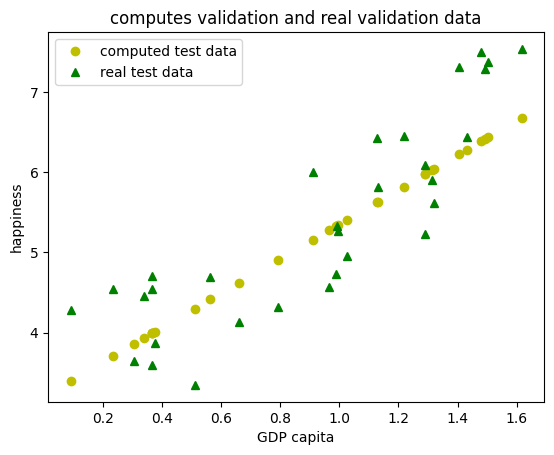

In [708]:
computedValidationOutputsGdp = regressorGdp.predict([[x] for x in validationInputs])

plt.plot(validationInputs, computedValidationOutputsGdp, 'yo', label='computed test data')
plt.plot(validationInputs, validationOutputs, 'g^', label='real test data')
plt.title('computes validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

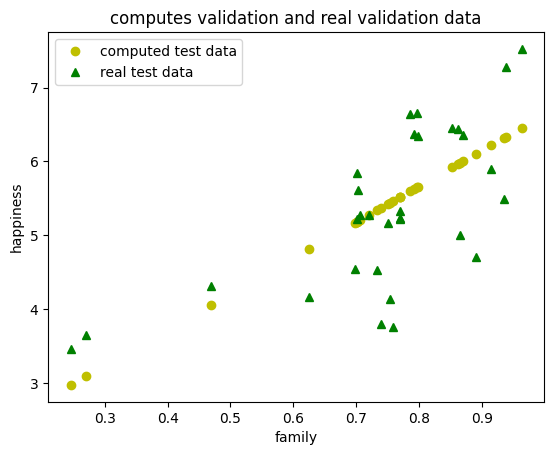

In [709]:
computedValidationOutputsFamily = regressorFamily.predict([[x] for x in validationInputsFamily])

plt.plot(validationInputsFamily, computedValidationOutputsFamily, 'yo', label='computed test data')
plt.plot(validationInputsFamily, validationOutputsFamily, 'g^', label='real test data')
plt.title('computes validation and real validation data')
plt.xlabel('family')
plt.ylabel('happiness')
plt.legend()
plt.show()

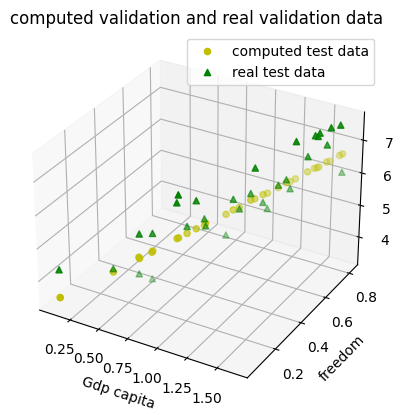

In [710]:
computedValidationOutputsGdpFreedom = regressorGdpFreedom.predict([[x1, x2] for (x1,x2) in zip(validationInputsGdp, validationInputsFreedom)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(validationInputsGdp, validationInputsFreedom, computedValidationOutputsGdpFreedom, c='y', marker='o', label='computed test data')
ax.scatter(validationInputsGdp, validationInputsFreedom, validationOutputsGdpFreedom, c='g', marker='^', label='real test data')
ax.set_xlabel('Gdp capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('computed validation and real validation data')
ax.legend()
plt.show()

In [711]:
error = 0.0
for t1, t2 in zip(computedValidationOutputsGdp, validationOutputs):
  error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputs, computedValidationOutputsGdp)
print('prediction error (tool): ', error)

prediction error (manual):  0.4142120438505252
prediction error (tool):  0.41421204385052524


In [712]:
error = 0.0
for t1, t2 in zip(computedValidationOutputsFamily, validationOutputsFamily):
  error += (t1 - t2) ** 2
error = error / len(validationOutputsFamily)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputsFamily, computedValidationOutputsFamily)
print('prediction error (tool): ', error)

prediction error (manual):  0.6274829309836725
prediction error (tool):  0.6274829309836725


In [713]:
error = 0.0
for t1, t2 in zip(computedValidationOutputsGdpFreedom, validationOutputsGdpFreedom):
  error += (t1 - t2) ** 2
error = error / len(validationOutputsGdpFreedom)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputsGdpFreedom, computedValidationOutputsGdpFreedom)
print('prediction error (tool): ', error)

prediction error (manual):  0.47998413739299317
prediction error (tool):  0.47998413739299306


Folsind datele aferente anului 2017 (fisierul v3_world-happiness-report-2017.csv), să se realizeze o predicție a gradului de fericire în funcție:

 - doar de Produsul intern brut (cu tool)
 - doar de caracteristica "Family" (cu tool)
 - de Produsul intern brut si de gradul de libertate (cu tool).

In [714]:
def loadData(fileName, inputVariabName, outputVariabName):
  data = []
  dataNames = []
  with open(fileName) as csvFile:
    csvReader = csv.reader(csvFile, delimiter=',')
    lineCount = 0
    for row in csvReader:
      if lineCount == 0:
        dataNames = row
      else:
        data.append(row)
      lineCount += 1
  selectedVariable = dataNames.index(inputVariabName)
  for i in range(len(data)):
    if data[i][selectedVariable] == "":
      data[i][selectedVariable] = np.nan
  inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
  selectedOutput = dataNames.index(outputVariabName)
  outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
  return inputs, outputs

filePath = os.path.join(crtDir, 'v3_world-happiness-report-2017.csv')

inputsGdp, outputsHappiness = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
inputsFamily, outputsHappiness = loadData(filePath, 'Family', 'Happiness.Score')
inputsFreedom, outputsHappiness = loadData(filePath, 'Freedom', 'Happiness.Score')

print('in Gdp: ', inputsGdp[:5])
print('in Family: ', inputsFamily[:5])
print('in Freedom: ', inputsFreedom[:5])
print('out Happiness: ', outputsHappiness[:5])

inputsGdpNonNull = [i for i in inputsGdp if not np.isnan(i)]
avgGdp = sum(inputsGdpNonNull) / len(inputsGdpNonNull)
inputsGdp = [i if not np.isnan(i) else avgGdp for i in inputsGdp]

inputsFamilyNonNull = [i for i in inputsFamily if not np.isnan(i)]
avgFamily = sum(inputsFamilyNonNull) / len(inputsFamilyNonNull)
inputsFamily = [i if not np.isnan(i) else avgFamily for i in inputsFamily]

inputsFreedomNonNull = [i for i in inputsFreedom if not np.isnan(i)]
avgFreedom = sum(inputsFreedomNonNull) / len(inputsFreedomNonNull)
inputsFreedom = [i if not np.isnan(i) else avgFreedom for i in inputsFreedom]

in Gdp:  [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
in Family:  [1.53352356, 1.551121593, 1.610574007, 1.516911745, 1.540246725]
in Freedom:  [0.635422587, 0.626006722, 0.627162635, 0.620070577, 0.617950857]
out Happiness:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


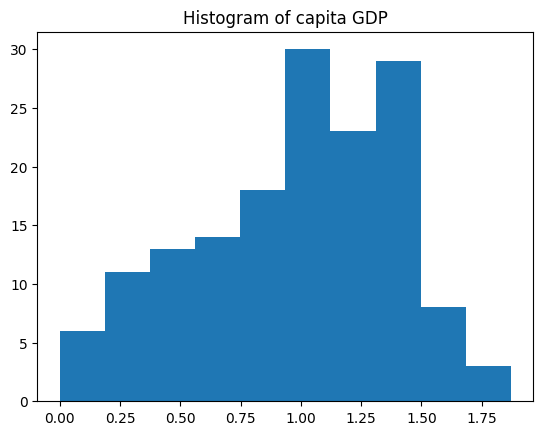

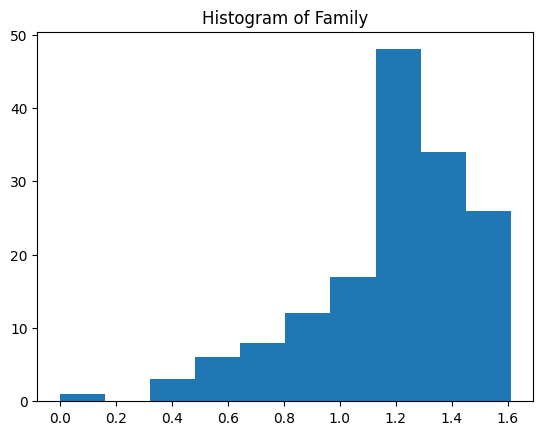

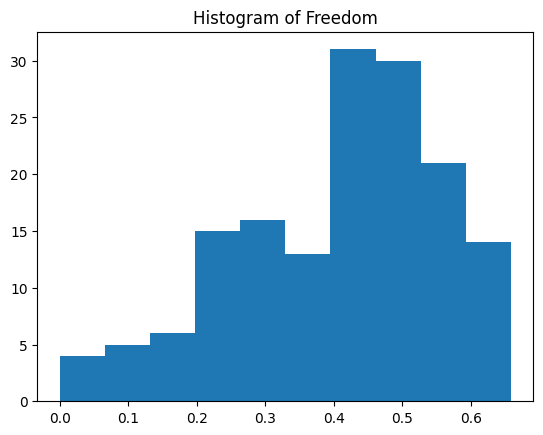

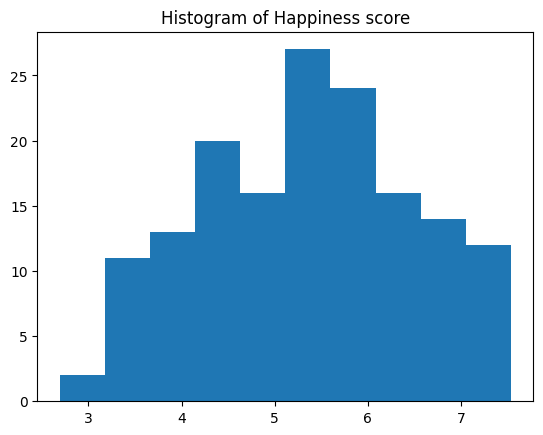

In [715]:
def plotData(x, variableName):
  n, bins, patches = plt.hist(x, 10)
  plt.title('Histogram of ' + variableName)
  plt.show()

plotData(inputsGdp, 'capita GDP')
plotData(inputsFamily, 'Family')
plotData(inputsFreedom, 'Freedom')
plotData(outputsHappiness, 'Happiness score')

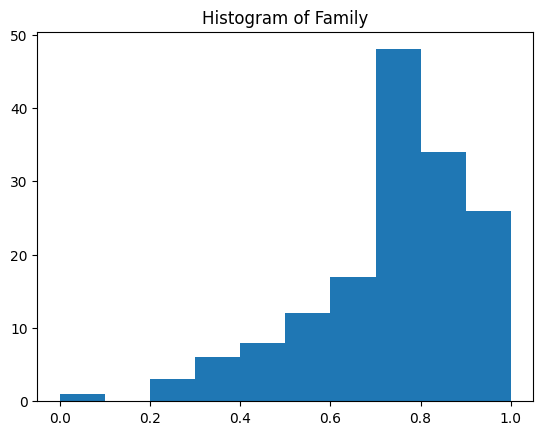

In [716]:
minVal = min(inputsFamily)
maxVal = max(inputsFamily)
normalFamily = [(x - minVal) / (maxVal - minVal) if maxVal > minVal else 0 for x in inputsFamily]
plotData(normalFamily, 'Family')

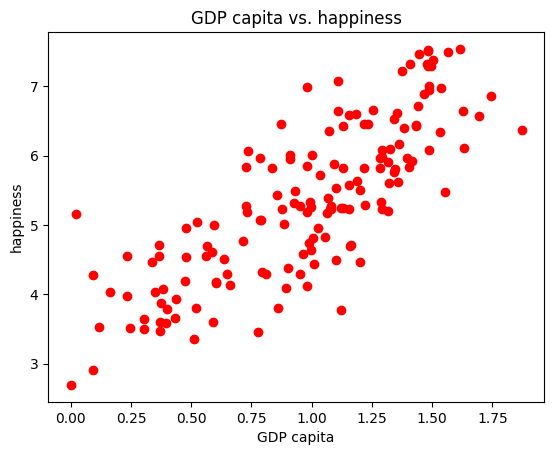

In [717]:
plt.plot(inputsGdp, outputsHappiness, 'ro')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()

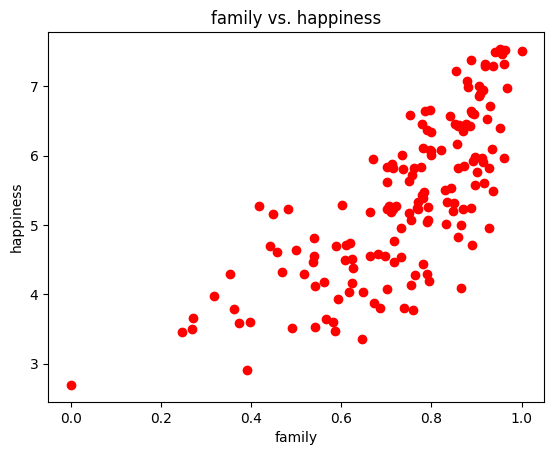

In [718]:
plt.plot(normalFamily, outputsHappiness, 'ro')
plt.xlabel('family')
plt.ylabel('happiness')
plt.title('family vs. happiness')
plt.show()

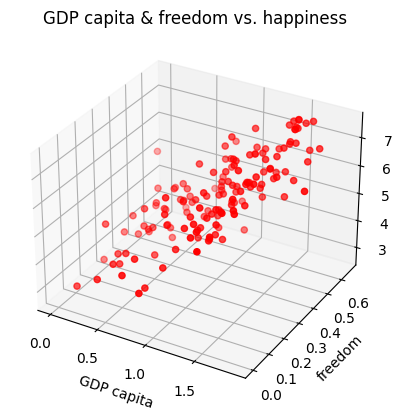

In [719]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputsGdp, inputsFreedom, outputsHappiness, color='r', marker='o')
ax.set_xlabel('GDP capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('GDP capita & freedom vs. happiness')
plt.show()

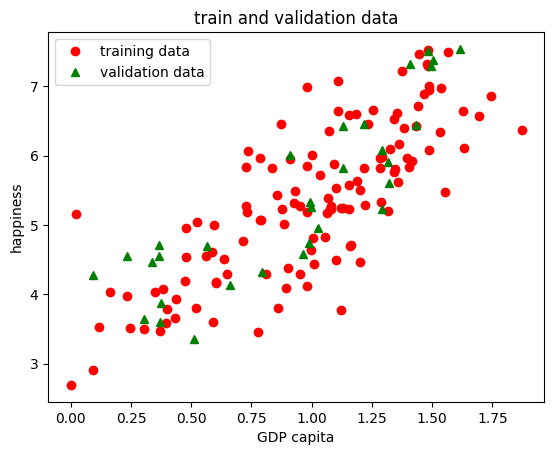

In [720]:
np.random.seed(5)
indexesGdp = [i for i in range(len(inputsGdp))]
trainSampleGdp = np.random.choice(indexesGdp, int(0.8 * len(inputsGdp)), replace=False)
validationSampleGdp = [i for i in indexesGdp if not i in trainSampleGdp]

trainInputs = [inputsGdp[i] for i in trainSampleGdp]
trainOutputs = [outputsHappiness[i] for i in trainSampleGdp]

validationInputs = [inputsGdp[i] for i in validationSampleGdp]
validationOutputs = [outputsHappiness[i] for i in validationSampleGdp]

plt.plot(trainInputs, trainOutputs, 'ro', label='training data')
plt.plot(validationInputs, validationOutputs, 'g^', label='validation data')
plt.title('train and validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

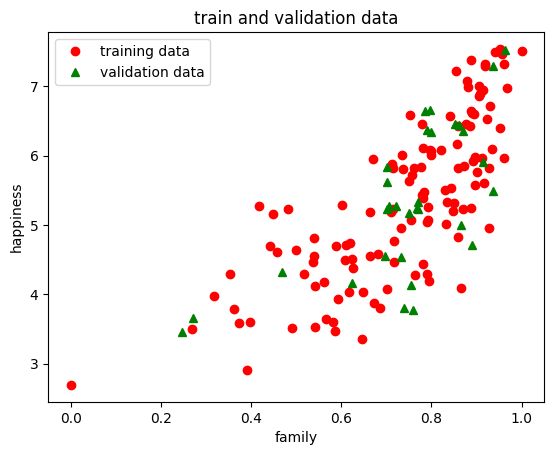

In [721]:
indexesFamily = [i for i in range(len(normalFamily))]
trainSampleFamily = np.random.choice(indexesFamily, int(0.8 * len(normalFamily)), replace=False)
validationSampleFamily = [i for i in indexesFamily if not i in trainSampleFamily]

trainInputsFamily = [normalFamily[i] for i in trainSampleFamily]
trainOutputsFamily = [outputsHappiness[i] for i in trainSampleFamily]

validationInputsFamily = [normalFamily[i] for i in validationSampleFamily]
validationOutputsFamily = [outputsHappiness[i] for i in validationSampleFamily]

plt.plot(trainInputsFamily, trainOutputsFamily, 'ro', label='training data')
plt.plot(validationInputsFamily, validationOutputsFamily, 'g^', label='validation data')
plt.xlabel('family')
plt.ylabel('happiness')
plt.title('train and validation data')
plt.legend()
plt.show()

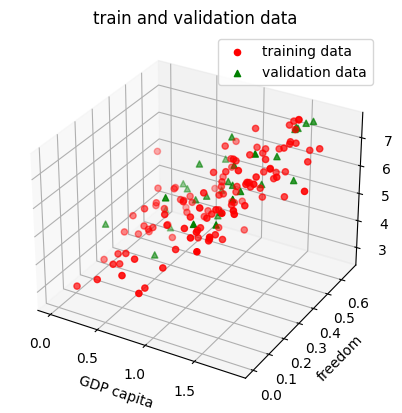

In [722]:
indexesGdpFreedom = [i for i in range(len(inputsFreedom))]
trainSampleGdpFreedom = np.random.choice(indexesGdpFreedom, int(0.8 * len(inputsFreedom)), replace=False)
validationSampleGdpFreedom = [i for i in indexesGdpFreedom if not i in trainSampleGdpFreedom]

trainInputsGdp = [inputsGdp[i] for i in trainSampleGdpFreedom]
trainInputsFreedom = [inputsFreedom[i] for i in trainSampleGdpFreedom]
trainOutputsGdpFreedom = [outputsHappiness[i] for i in trainSampleGdpFreedom]

validationInputsGdp = [inputsGdp[i] for i in validationSampleGdpFreedom]
validationInputsFreedom = [inputsFreedom[i] for i in validationSampleGdpFreedom]
validationOutputsGdpFreedom = [outputsHappiness[i] for i in validationSampleGdpFreedom]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputsGdp, trainInputsFreedom, trainOutputsGdpFreedom, color='r', marker='o', label='training data')
ax.scatter(validationInputsGdp, validationInputsFreedom, validationOutputsGdpFreedom, color='g', marker='^', label='validation data')
ax.set_xlabel('GDP capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('train and validation data')
ax.legend()
plt.show()

In [723]:
xxGdp = [[el] for el in trainInputs]
regressorGdp = linear_model.LinearRegression()
regressorGdp.fit(xxGdp, trainOutputs)
w0Gdp, w1Gdp = regressorGdp.intercept_, regressorGdp.coef_[0]
print('the learnt model: f(x) = ', w0Gdp, ' + ', w1Gdp, ' * x')

the learnt model: f(x) =  3.2308047475402843  +  2.1294428916656387  * x


In [724]:
xxFamily = [[el] for el in trainInputsFamily]
regressorFamily = linear_model.LinearRegression()
regressorFamily.fit(xxFamily, trainOutputsFamily)
w0Family, w1Family = regressorFamily.intercept_, regressorFamily.coef_[0]
print('the learnt model: f(x) = ', w0Family, ' + ', w1Family, ' * x')

the learnt model: f(x) =  1.7869634078695311  +  4.8480741528511055  * x


In [725]:
xxGdpFreedom = [[x1, x2] for (x1, x2) in zip(trainInputsGdp, trainInputsFreedom)]
regressorGdpFreedom = linear_model.LinearRegression()
regressorGdpFreedom.fit(xxGdpFreedom, trainOutputsGdpFreedom)
w0GdpFreedom, w1GdpFreedom, w2GdpFreedom = regressorGdpFreedom.intercept_, regressorGdpFreedom.coef_[0], regressorGdpFreedom.coef_[1]
print('the learnt model: f(x) = ', w0GdpFreedom, ' + ', w1GdpFreedom, ' * x1 + ', w2GdpFreedom, ' * x2')

the learnt model: f(x) =  2.5317418960468885  +  1.8401812462083096  * x1 +  2.3268916875190726  * x2


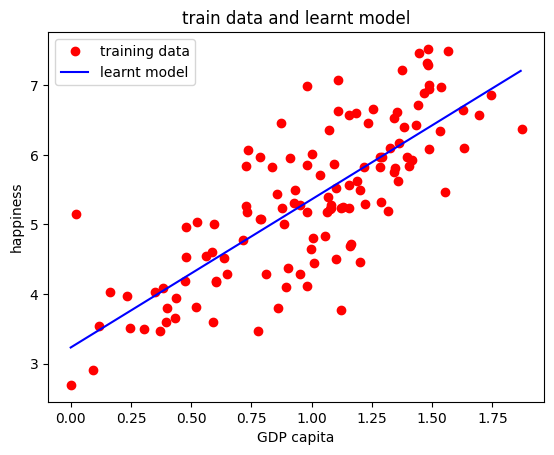

In [726]:
noOfPoints = 1000
xrefGdp = []
valGdp = min(trainInputs)
stepGdp = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
  xrefGdp.append(valGdp)
  valGdp += stepGdp
yrefGdp = [w0Gdp + w1Gdp * el for el in xrefGdp]

plt.plot(trainInputs, trainOutputs, 'ro', label='training data')
plt.plot(xrefGdp, yrefGdp, 'b-', label='learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('train data and learnt model')
plt.legend()
plt.show()

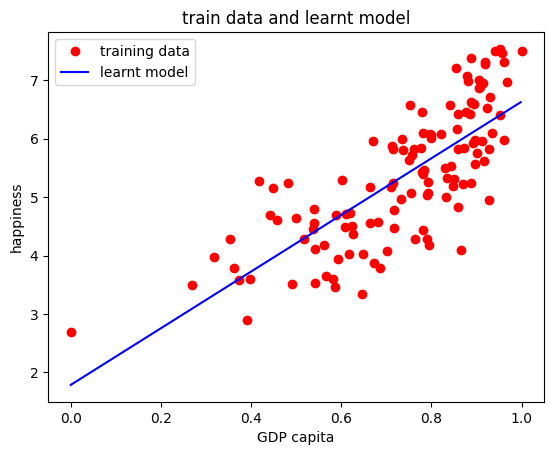

In [727]:
xrefFamily = []
valFamily = min(trainInputsFamily)
stepFamily = (max(trainInputsFamily) - min(trainInputsFamily)) / noOfPoints
for i in range(1, noOfPoints):
  xrefFamily.append(valFamily)
  valFamily += stepFamily
yrefFamily = [w0Family + w1Family * el for el in xrefFamily]

plt.plot(trainInputsFamily, trainOutputsFamily, 'ro', label='training data')
plt.plot(xrefFamily, yrefFamily, 'b-', label='learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('train data and learnt model')
plt.legend()
plt.show()

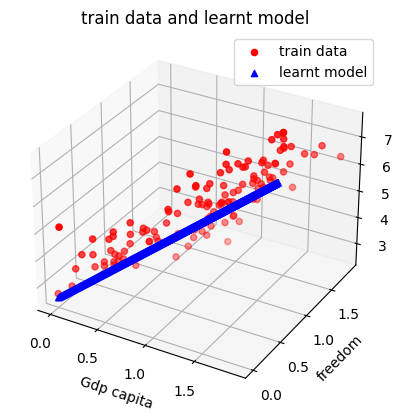

In [728]:
xrefGdpFreedom = []
yrefGdpFreedom = []
valGdp = min(trainInputsGdp)
valFreedom = min(trainInputsFreedom)
stepGdp = (max(trainInputsGdp) - min(trainInputsGdp)) / noOfPoints
stepFreedom = (max(trainInputsFreedom) - min(trainInputsFreedom)) / noOfPoints
for i in range(1, noOfPoints):
  xrefGdpFreedom.append(valGdp)
  yrefGdpFreedom.append(valFreedom)
  valGdp += stepGdp
  valFreedom += stepFreedom
zrefGdpFreedom = [w0GdpFreedom + w1GdpFreedom * x1 + w2GdpFreedom * x2 for (x1, x2) in zip(xrefGdpFreedom, yrefGdpFreedom)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputsGdp, trainInputsGdp, trainOutputsGdpFreedom, c='r', marker='o', label='train data')
ax.scatter(xrefGdpFreedom, yrefGdpFreedom, zrefGdpFreedom, c='b', marker='^', label='learnt model')
ax.set_xlabel('Gdp capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('train data and learnt model')
ax.legend()
plt.show()

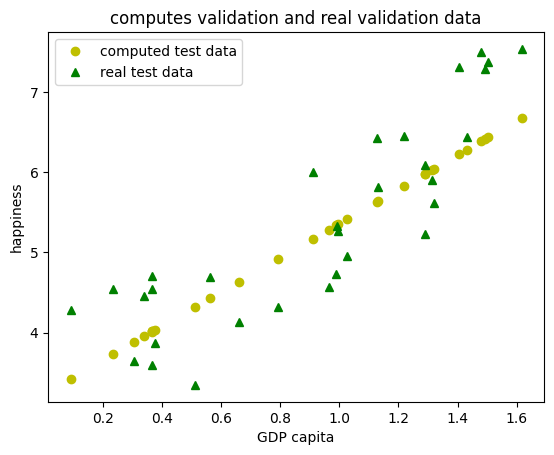

In [729]:
computedValidationOutputsGdp = regressorGdp.predict([[x] for x in validationInputs])

plt.plot(validationInputs, computedValidationOutputsGdp, 'yo', label='computed test data')
plt.plot(validationInputs, validationOutputs, 'g^', label='real test data')
plt.title('computes validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

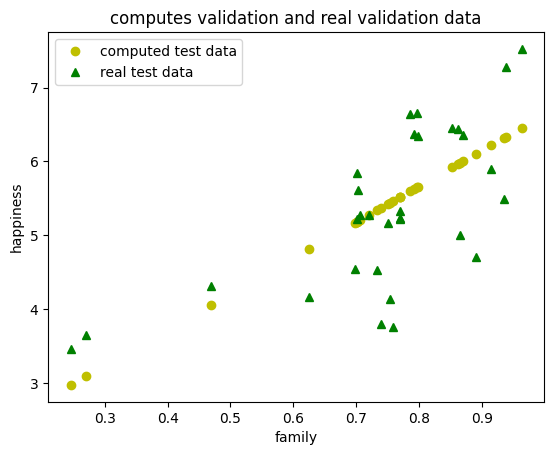

In [730]:
computedValidationOutputsFamily = regressorFamily.predict([[x] for x in validationInputsFamily])

plt.plot(validationInputsFamily, computedValidationOutputsFamily, 'yo', label='computed test data')
plt.plot(validationInputsFamily, validationOutputsFamily, 'g^', label='real test data')
plt.title('computes validation and real validation data')
plt.xlabel('family')
plt.ylabel('happiness')
plt.legend()
plt.show()

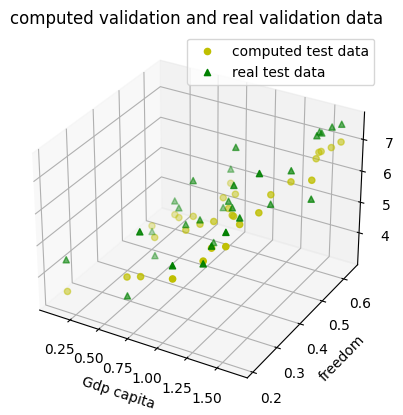

In [731]:
computedValidationOutputsGdpFreedom = regressorGdpFreedom.predict([[x1, x2] for (x1,x2) in zip(validationInputsGdp, validationInputsFreedom)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(validationInputsGdp, validationInputsFreedom, computedValidationOutputsGdpFreedom, c='y', marker='o', label='computed test data')
ax.scatter(validationInputsGdp, validationInputsFreedom, validationOutputsGdpFreedom, c='g', marker='^', label='real test data')
ax.set_xlabel('Gdp capita')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
ax.set_title('computed validation and real validation data')
ax.legend()
plt.show()

In [732]:
error = 0.0
for t1, t2 in zip(computedValidationOutputsGdp, validationOutputs):
  error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputs, computedValidationOutputsGdp)
print('prediction error (tool): ', error)

prediction error (manual):  0.4122807289631499
prediction error (tool):  0.4122807289631499


In [733]:
error = 0.0
for t1, t2 in zip(computedValidationOutputsFamily, validationOutputsFamily):
  error += (t1 - t2) ** 2
error = error / len(validationOutputsFamily)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputsFamily, computedValidationOutputsFamily)
print('prediction error (tool): ', error)

prediction error (manual):  0.6274829309836725
prediction error (tool):  0.6274829309836725


In [734]:
error = 0.0
for t1, t2 in zip(computedValidationOutputsGdpFreedom, validationOutputsGdpFreedom):
  error += (t1 - t2) ** 2
error = error / len(validationOutputsGdpFreedom)
print('prediction error (manual): ', error)

error = mean_squared_error(validationOutputsGdpFreedom, computedValidationOutputsGdpFreedom)
print('prediction error (tool): ', error)

prediction error (manual):  0.44547915996402204
prediction error (tool):  0.44547915996402204
